In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
train_data = pd.read_csv("train.csv")

In [59]:
test_data = pd.read_csv("test.csv")

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [67]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [71]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
#fillin missng Age values with median 
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

In [81]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

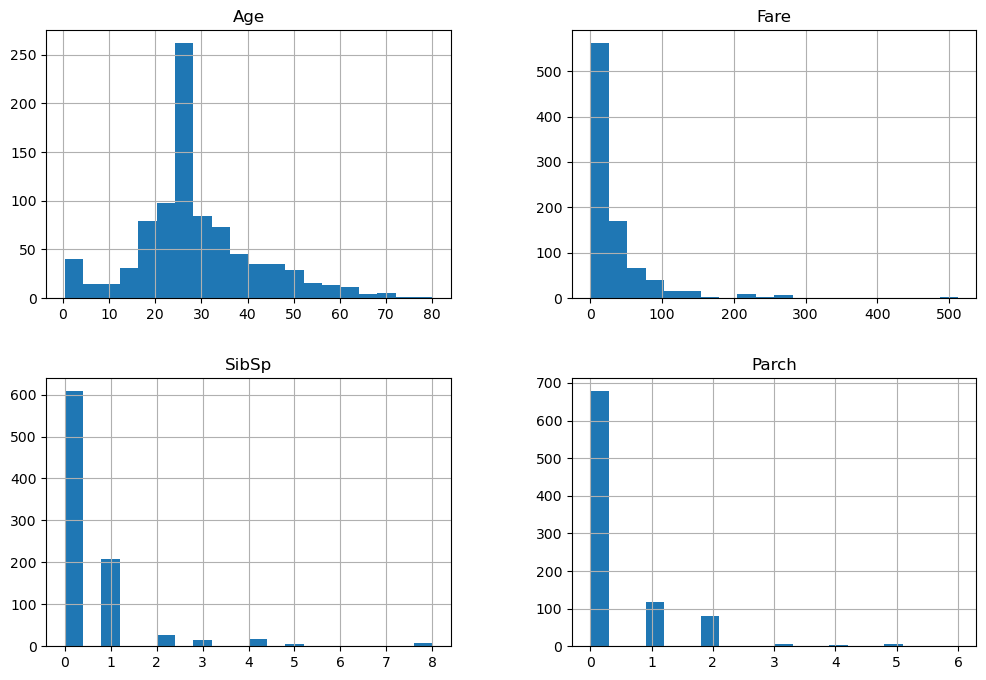

In [83]:
#plot histograms for numerical features
train_data[['Age','Fare','SibSp','Parch']].hist(bins = 20, figsize = (12,8))
plt.show()

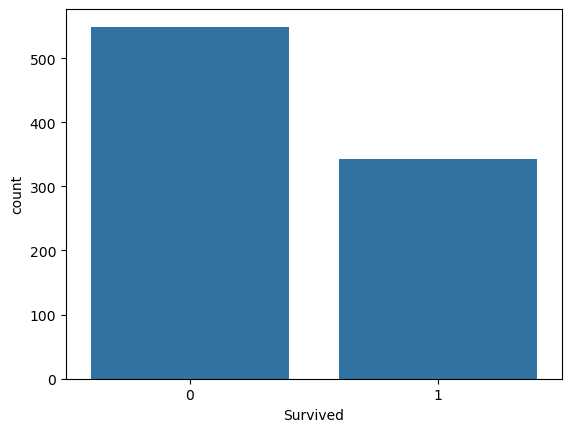

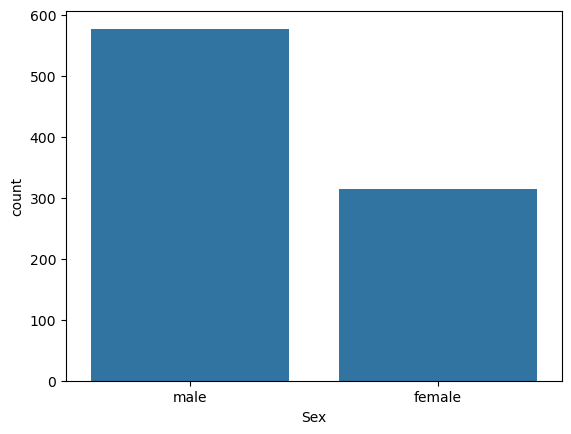

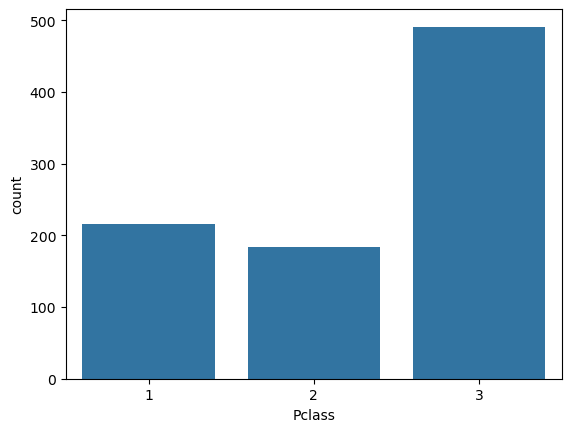

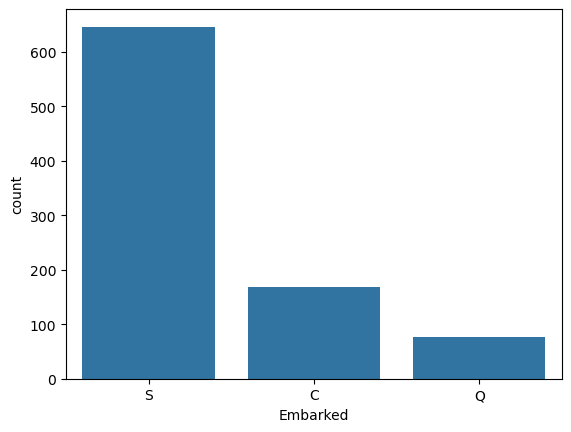

In [85]:
#plot bar chart for categorical columns
sns.countplot(x='Survived', data = train_data)
plt.show()
sns.countplot(x= 'Sex', data = train_data)
plt.show()
sns.countplot(x= 'Pclass', data = train_data)
plt.show()
sns.countplot(x='Embarked',data = train_data)
plt.show()

In [87]:
# BIVARIATE ANALYSIS


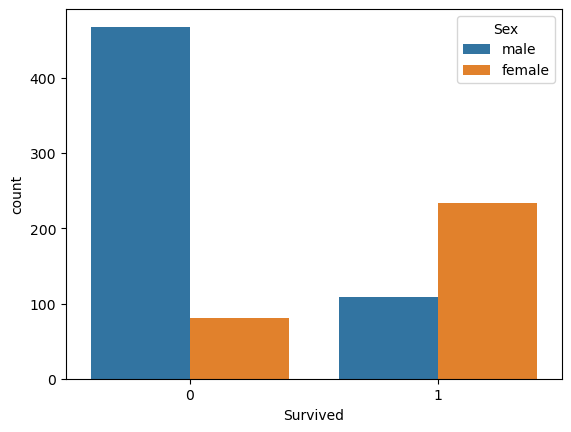

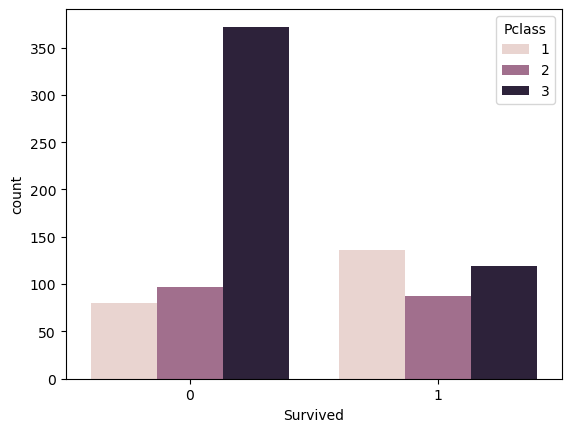

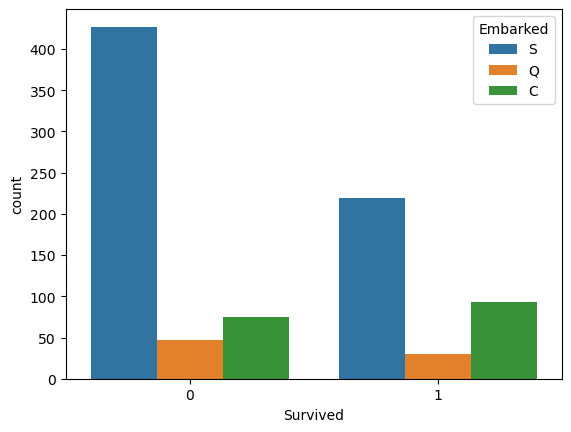

In [89]:
#Categorical  vs. Survived
sns.countplot(x='Survived', hue = 'Sex', data = train_data)
plt.show()

sns.countplot(x='Survived', hue = 'Pclass',data = train_data)
plt.show()

sns.countplot(x='Survived', hue = 'Embarked', data = train_data)
plt.show()


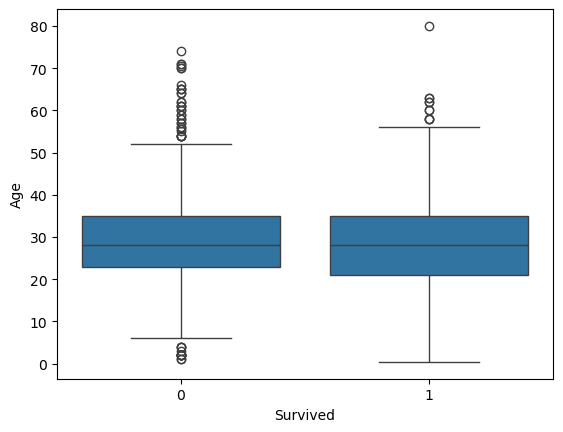

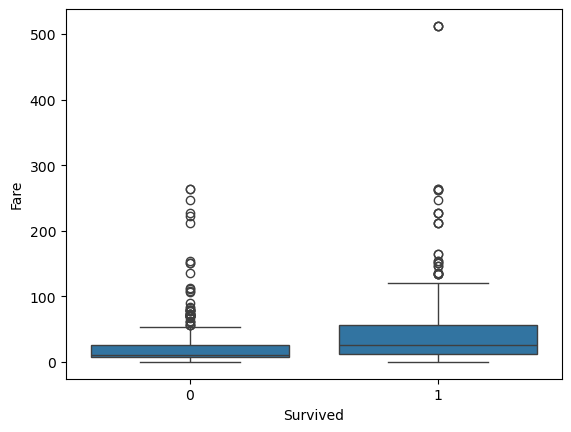

In [91]:
#Numerical vs Survived
sns.boxplot(x='Survived', y = 'Age', data = train_data)
plt.show()

sns.boxplot(x='Survived', y = 'Fare', data = train_data)
plt.show()

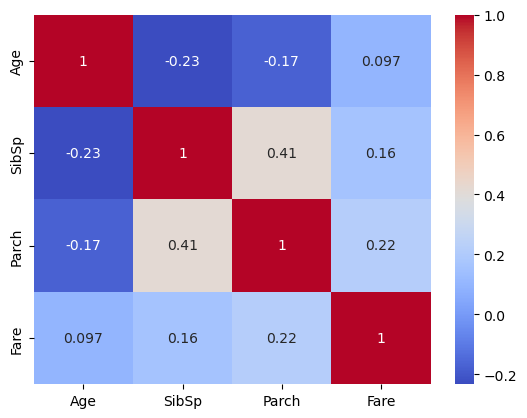

In [93]:
#correlation heatmap
corr_matrix = train_data[['Age','SibSp','Parch','Fare']].corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [95]:
#Multivariate Analysis


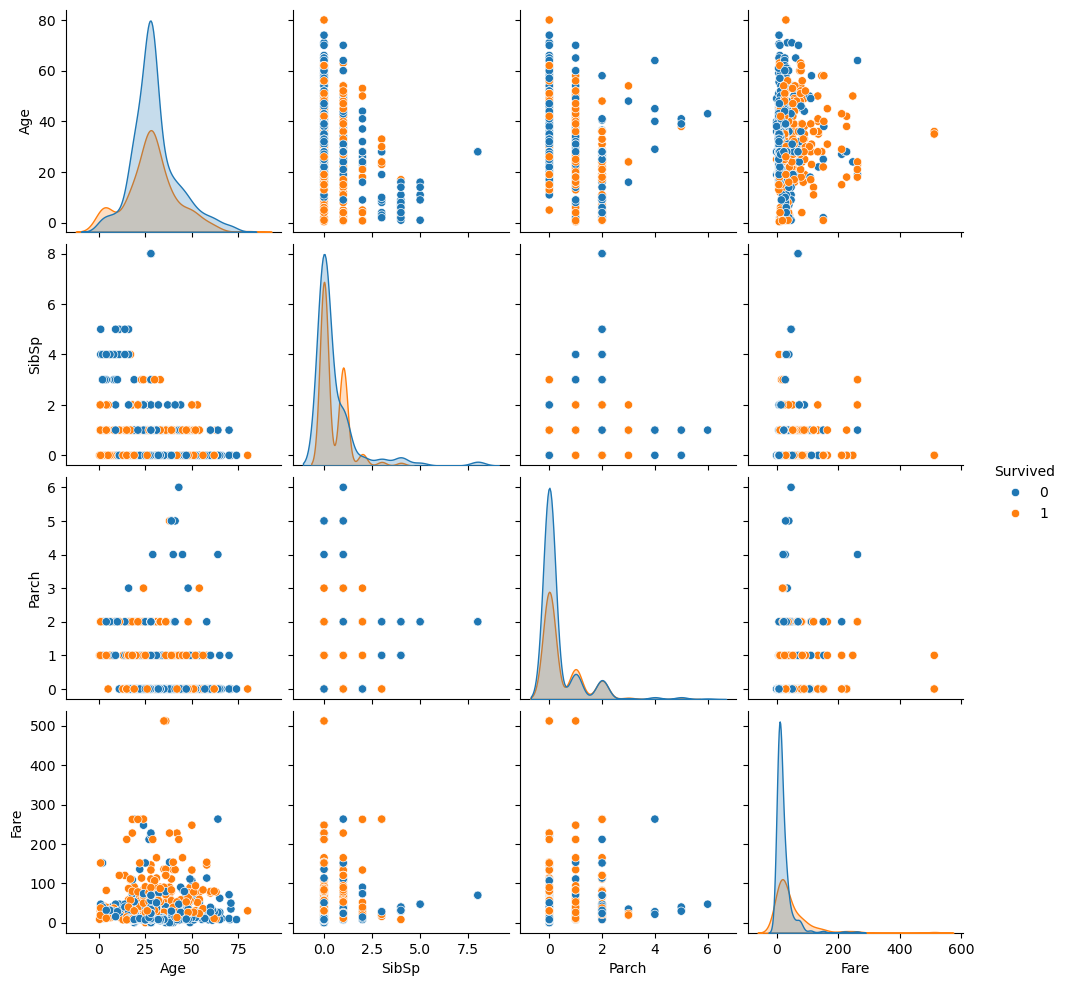

In [99]:
#Pairplot for numerical features
sns.pairplot(train_data[['Age','SibSp','Parch','Fare','Survived']], hue = 'Survived')
plt.show()

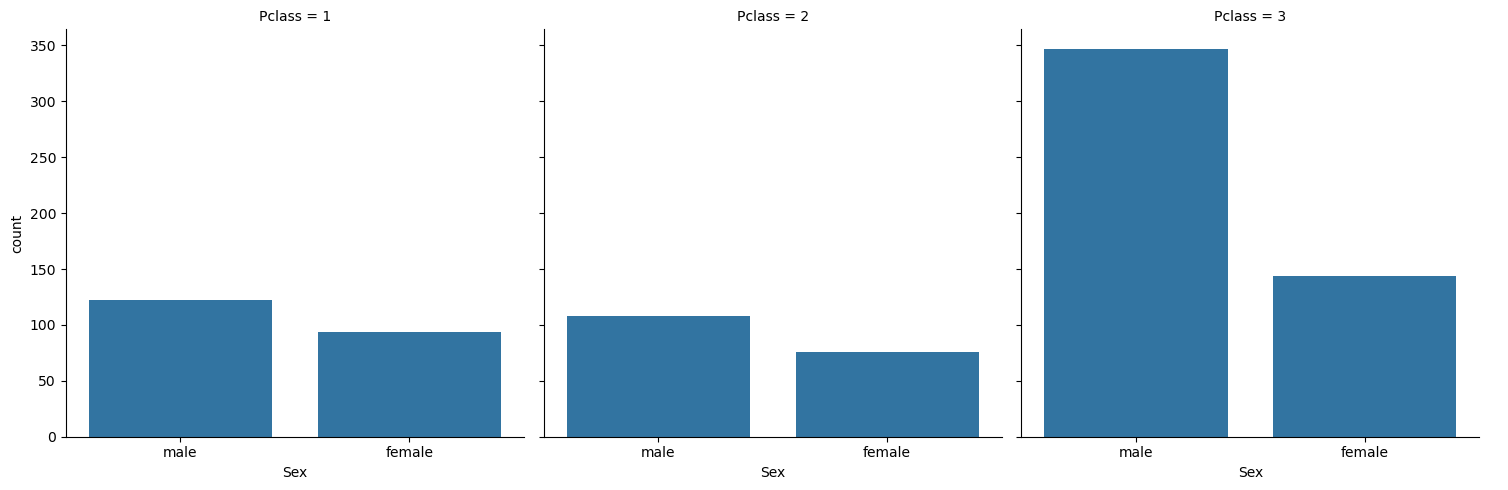

In [109]:
# FacetGrid /Survival based on Pclass and Sex
sns.catplot(
    data=train_data,
    x="Sex",
    kind="count",
    col="Pclass",
    order=["male", "female"]
)
plt.show()


In [ ]:
## 📌 Summary of Findings

1. Survival Rate:Dataset is imbalanced, with around 60% not surviving and 40% surviving.
2. Passenger Class:Most passengers were in 3rd class, followed by 1st and then 2nd.
3. Age Distribution:Most passengers are aged between 20 to 30 years.
4. Family Size:Most passengers had 0 or 1 sibling/spouse with them.
5. Fare Correlation:Majority of fares are below $50, but there are extreme outliers above $200.
6. Missing Values: 'Age' and 'Cabin' had missing data; 'Cabin' was mostly empty and might not be reliable.
